In [1]:

import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt


from sklearn.preprocessing import StandardScaler

# "int_corr", "dec", "samerace", "race_o", "race", "imprace", "imprelig", "age_o", "age","goal", "date", "go_out",
class ml:
    
    def __init__(self, path):
        self.path = path
        self.data_begin = pd.read_csv(self.path, engine='python')
        self.data = self.data_begin.copy()
        self.data = self.data[["iid", "gender", "age", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]]
        self.data = self.data.dropna()
        self.get_uniques()
        #self.make_age_groups()
        self.gender_distinguish()
        #self.decision_distinguish()
        
        #self.goal_distinguish_decided()
        #self.goal_distinguish_not_decided()
        
        #self.scaler = MinMaxScaler()
        #solutions_set_scaled = self.scaler.fit_transform(self.data)
        #self.data = normalize(self.data)
        #self.data = pd.DataFrame(solutions_set_scaled, columns = self.data.columns)
        #self.decided = []

    def gender_distinguish(self):
        is_man = self.data['gender'] == 1
        is_woman = self.data['gender'] == 0
        
        scaler = StandardScaler()

        self.man = self.data[is_man].copy()
        
        self.man_drop = self.man.drop(columns='gender')
        
        #self.man_scaled = scaler.fit_transform(self.man_drop)

        self.woman = self.data[is_woman].copy()
        
        self.woman_drop = self.woman.drop(columns='gender')
        
        #self.woman_scaled = scaler.fit_transform(self.woman_drop)
        

        
    def append_choices(self):
        self.decided = [self.man_ons_decided, self.man_date_decided, self.woman_ons_decided, self.woman_date_decided]
        
    def get_uniques(self):
        self.data.drop_duplicates(inplace=True)
        self.data.drop(columns='iid', inplace=True)
        #self.woman.drop_duplicates(inplace=True)
       # self.woman.drop(columns='iid', inplace=True)
        #pass
       
   
    
class age_groups:
    
    def __init__(self, unscaled):
        self.unscaled = unscaled
        
    
    def make_age_groups(self):
        self.unscaled_to_25 = self.unscaled.loc[self.unscaled.age <= 25]
        self.unscaled_to_28 = self.unscaled.loc[(self.unscaled.age >= 26) & (self.unscaled.age <= 28)]
        self.unscaled_up_29 = self.unscaled.loc[(self.unscaled.age >= 29)]
        
        self.unscaled_to_25.drop(columns='age', inplace=True)
        self.unscaled_to_28.drop(columns='age', inplace=True)
        self.unscaled_up_29.drop(columns='age', inplace=True)
         
    #    return self.unscaled_to_25_drop, self.unscaled_to_35_drop, self.unscaled_up_35_drop
        return self.unscaled_to_25, self.unscaled_to_28, self.unscaled_up_29
    
    

class get_standard_fit:
    
    def __init__(self, dataset):
        self.dataset = dataset
        self.make_standarization()


    def make_standarization(self):
        scaler = StandardScaler()
        self.dataset_scaled = scaler.fit_transform(self.dataset)
        return self.dataset_scaled
    
    
### specify path to unziped file
### https://www.kaggle.com/annavictoria/speed-dating-experiment?select=Speed+Dating+Data.csv
path = r'B:\path\to_file.csv'
first_class = ml(path)




B:\Programy\Python\Anaconda\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


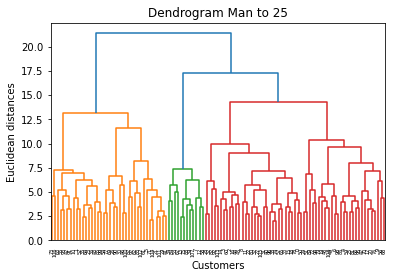

In [2]:

man = first_class.man_drop
objects = age_groups(man)
object_to_25, object_to_28, object_up_29 = objects.make_age_groups()
objects = [object_to_25, object_to_28, object_up_29]

object_to_25_fit = get_standard_fit(object_to_25).make_standarization()
object_to_28_fit = get_standard_fit(object_to_28).make_standarization()
object_up_29_fit = get_standard_fit(object_up_29).make_standarization()

obj_fit = object_to_25_fit
figure_name = "Man to 25"


import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(obj_fit, method  = "ward"))
plt.title('Dendrogram ' + figure_name)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



B:\Programy\Python\Anaconda\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
B:\Programy\Python\Anaconda\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


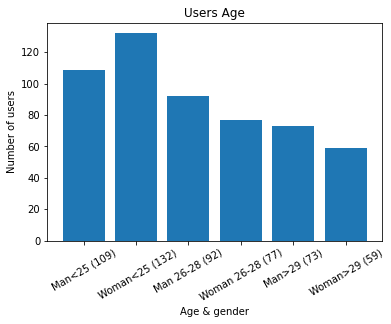

<Figure size 432x288 with 0 Axes>

In [3]:
woman = first_class.woman_drop
women = age_groups(woman)
women_to_25, women_to_28, women_up_29 = women.make_age_groups()
man = first_class.man_drop
men = age_groups(man)
men_to_25, men_to_28, men_up_29 = men.make_age_groups()
objects = [len(men_to_25),len(women_to_25), len(men_to_28),len(women_to_28), len(men_up_29), len(women_up_29)]



len(object_to_25_fit)

label = ['Man<25 ('+str(objects[0])+')', ' Woman<25 ('+str(objects[1])+')', 'Man 26-28 ('+str(objects[2])+')', 'Woman 26-28 ('+str(objects[3])+')', 'Man>29 ('+str(objects[4])+')', 'Woman>29 ('+str(objects[5])+')']

index = np.arange(len(label))
plt.bar(index, objects)
plt.title('Users Age')
plt.xlabel('Age & gender')
plt.ylabel('Number of users')
plt.xticks(index, label, fontsize=10, rotation=30)

plt.savefig("UsersAge", dpi=600,bbox_inches='tight')
plt.show()
fig = plt.figure()
#savefig("UsersAge", bbox_inches='tight')

[0 1 0 0 0 1 0 2 0 0 1 0 2 2 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 2 1 1
 0 0 2 0 1 1 1 0 0 1 0 0 0 0 0 1 2 1 1 0 0 2 0 0 1 1 1 1 0 0 2 0 1 0 1 0 1
 0 2 0 1 0 0 0 0 0 1 2 1 0 1 2 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 2 0]


,PC1,PC2,labels
0,-0.026683,-1.142477,0
1,-1.725839,-0.570822,1
2,0.895671,-2.788898,0
3,0.588139,-1.820680,0
4,-0.250394,1.065401,0
...,...,...,...
104,-3.471536,-0.192115,1
105,-1.436862,-1.376082,0
106,-2.596896,-1.227850,1
107,3.567504,0.731896,2


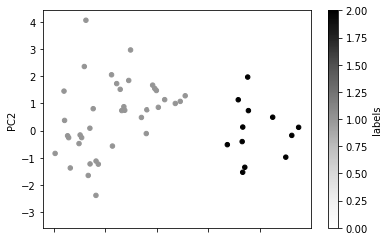

In [4]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(obj_fit)


cluster.labels_
print(labels)


from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
data_subset_pca = pca.fit_transform(obj_fit)
data_subset_pca

data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2']), 
                            pd.DataFrame(labels, columns=['labels'])], axis=1)
data_subset_tf.plot.scatter(x='PC1', y='PC2', c='labels')
data_subset_tf

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

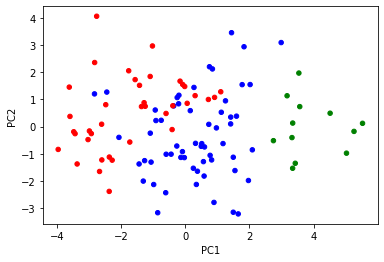

In [5]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0, 1, 2], ['b', 'r', 'g']))

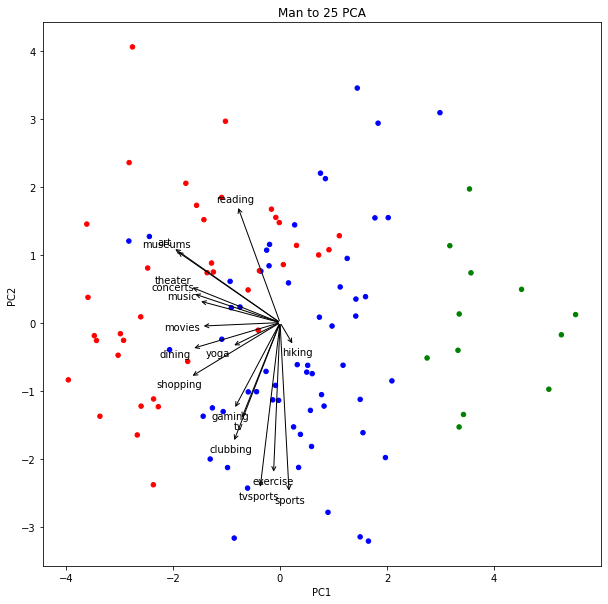

In [6]:
import matplotlib.pyplot as plt

plot = data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.labels.replace([0, 1, 2], ['b', 'r', 'g']), figsize=(10,10))
#plt.arrow(0, 0, pca.components_[0,0]*8, pca.components_[0,1]*8, shape='left')
#plt.arrow(0, 0, pca.components_[0,2]*8, pca.components_[1,2]*8, shape='left')
for i, colname in enumerate(object_to_25.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=10,
             xytext=(pca.components_[0,i]*6, pca.components_[1,i]*6), 
             arrowprops = {'arrowstyle':'<-'})
plt.title(figure_name+" PCA")

fig = plot.get_figure()
fig.savefig(figure_name + " PCA", dpi=600)

B:\Programy\Python\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'WSS')

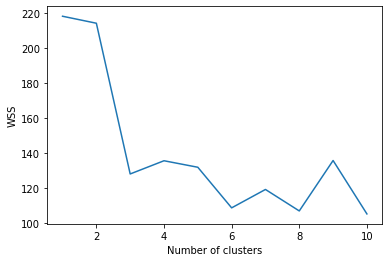

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
import numpy as np

#Elbow method taken from: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

plt.plot(np.linspace(1, 10, 10), calculate_WSS(obj_fit, 10))
plt.xlabel('Number of clusters')
plt.ylabel('WSS')

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 3, min_samples = 4)

model = dbscan.fit(obj_fit)

labels = model.labels_

In [9]:
from sklearn import metrics

core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Silhoutte Coeficcient: %0.3f" % metrics.silhouette_score(obj_fit,labels))

[ True False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False  True False  True False False False False False False
 False  True  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False  True
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False  True  True False False
 False]
Silhoutte Coeficcient: -0.031
